### 목표
 - 타이타닉 탑승개의 생존 여부를 예측해보자.
 - 간단하게 데이터 시각화를 해보자
 - Baseline Model을 만들어보자.(모델링)
 - 인코딩 개념을 알아보자.

In [54]:
import numpy as np #고차원의 배열을 빠르게 연산하는 도구
import pandas as pd #행,열로 구성된 표 데이터를 다루는 도구
import matplotlib.pyplot as plt #시각화 라이브러리
import seaborn as sns #시각화 라이브러리

## Q1. 훈련데이터와 테스트 데이터를 로딩해보자

In [55]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Q2. 로딩한 데이터 정보를 확인해보자(컬럼 갯수, 결축치 유무, 데이터타입 등)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 -  결측치 : Age, Cabin, Embarked

In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- 결측치 : Age, Fare, Cabin

## Q3. 정답컬럼의 비율을 알아보자.

In [58]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Q4. 기술통계 값 확인

In [59]:
train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
# 범주형 데이터 기술 통계 확인

In [61]:
train[['Name','Sex','Ticket','Cabin','Embarked']].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hamalainen, Mrs. William (Anna)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


## 데이터 시각화
- 범주형 데이터
  - 반도기반의 시각화 방법 : bar char pie chart
- 수지형 데이터
  - 시계열 데이터 : line plot
  - 두 변수 사이의 관계를 보기위한 그래프 : scatter plt
  - 수치 데이터를 구간화하는 그래프(밀집도) : histogram.KDE(커널밀도추정)
- 텍트스 데이터(비정형)
  - 정형화한 후 빈도를 보는 방법
  - 단어와 단어 사이를 쪼개서 빈도를 보는 그래프: wordcloud

## 범주형 데이터 시각화

## Pclass 시각화

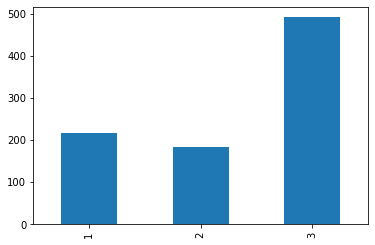

In [62]:
# 데이터 프레임 시각화
# 등급별 사람 수를 시각화
train['Pclass'].value_counts().sort_index().plot(kind='bar')

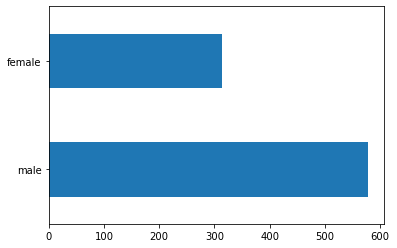

In [63]:
train['Sex'].value_counts().plot(kind='barh')

## 생존여부를 중심으로 시각화해보자!!

In [64]:
train.pivot_table(index='Sex',columns = 'Survived', values = 'Pclass',aggfunc="count")

Survived,0,1
Sex,,
female,81,233
male,468,109


In [65]:
# values 를 결측치가 없는것으로 햇음(영향을 안주는 것으로)

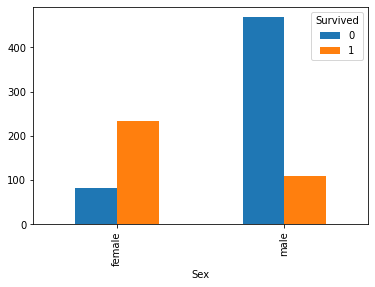

In [66]:
train.pivot_table(index='Sex',columns = 'Survived', values = 'Pclass',aggfunc="count").plot(kind = 'bar')

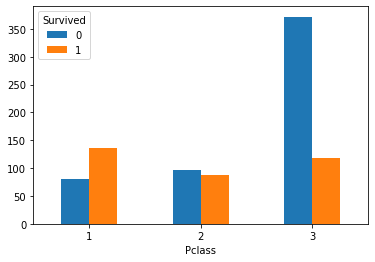

In [67]:
# 등급 생존 여부
train.pivot_table(index='Pclass',
                  columns = 'Survived',
                  values = 'Name',
                  aggfunc="count").plot(kind = 'bar',rot=0)

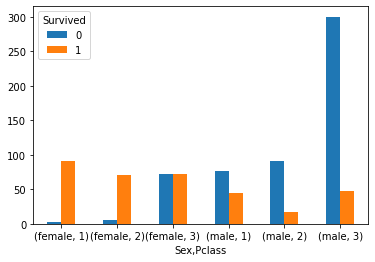

In [68]:
#등급, 성별, 생존여부
train.pivot_table(index=['Sex','Pclass'],
                  columns = 'Survived',
                  values = 'Name',
                  aggfunc="count").plot(kind = 'bar',rot=0)

## 수치형 데이터 시각화

In [69]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

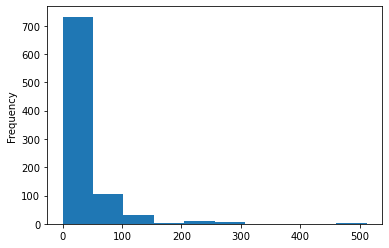

In [70]:
# 히스토그램
#plt.hist(train["Fare"])
train['Fare'].plot(kind = 'hist')

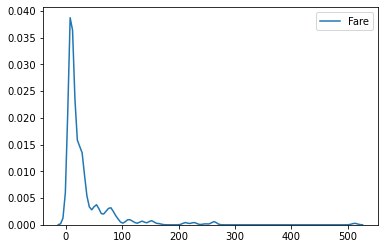

In [71]:
# 커널 밀도 추정(KDE) 그래프
sns.kdeplot(train['Fare'])

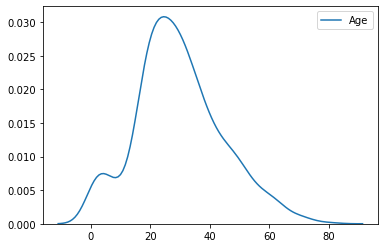

In [72]:
# 나이 KDE 그래프
sns.kdeplot(train['Age'])

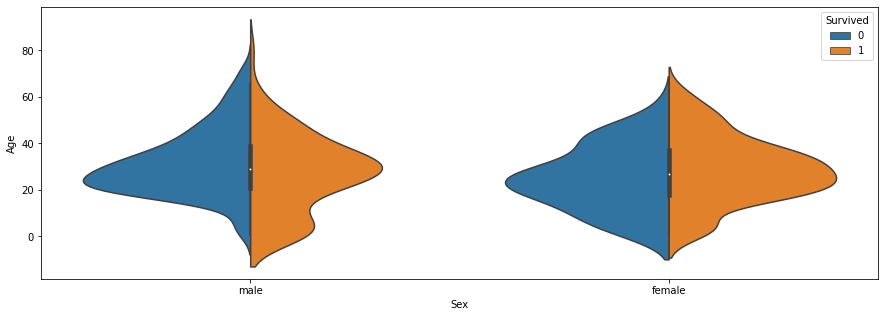

In [73]:
# seaborn violin plot
plt.figure(figsize=(15,5))
sns.violinplot(data = train,
              x='Sex',  # x축에 사용할 컬럼(수치형 데이터 넣어주면 좋음)
              y='Age', #y 축이 사용할 컬럼
            hue = 'Survived', # KDE를 그릴때 구분할 컬럼
            split = True  ) 

 - 나이가 어린 친구들중에는 남성이면 산 아이들 비율이 높고, 여성이면 죽은 아이들의 비율이 높다
 - 성별은 나이와 함께 고려해도 좋은 컬럼이다.
 - Pclass와도 좋은 특징을 보여줬으니 성별을 빼먹지 말자.

## BaseLine model 구축하기

1. 모델정의
2. 학습
3. 예측
4. 평가

# 모델정의

##### Q5.KNN,Decision Tree 모델생성

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [75]:
knn_model = KNeighborsClassifier() #기본 이웃 값 5
tree_model = DecisionTreeClassifier(random_state=208)

학습

In [76]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [77]:
#문제와 답으로 분리
feature_names = ['Pclass','Age','SibSp','Parch','Fare']
x = train[feature_names]
y = train['Survived']

##### 결측치 처리
 - 결측치가 있는 경우에는 학습이 불가능
 ![image.png](attachment:image.png)
 - 결측치 처리 방안
     1. 결측치 삭제
        - 데이터양이 많은 경우
        - 결측치 데이터의 비율이 전체 대비 높은경우
     2. 결측치를 대체값으로 채우는 방법
        - 데이터양이 적은 경우
        - 결측치 데이터의 비율이 전체 대비 낮은 경우

##### Age의 결측치를 채워보자.
 - 전체 나이의 중앙값으로 결측치를 채워보자

In [78]:
# 함수를 이용해 채우기
train['Age'].fillna(train['Age'].median(),inplace=True)

In [79]:
train['Age']
x['Age'] = train['Age']

<ipython-input-79-db9c26ee75eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Age'] = train['Age']


In [80]:
knn_model.fit(x,y)

KNeighborsClassifier()

In [81]:
tree_model.fit(x,y)

DecisionTreeClassifier(random_state=208)

In [82]:
#train 데이터는 문제와 답을 다 가지고 있음!!
#knn_pre = knn_model.predict(test) 이렇게 쓰면
#test에 대한 정답은 없어서 오류가 뜸

In [83]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

예측
 1. 훈련시에 사용했던 컬럼 그대로 test 데이터 셋을 구성해야한다.
 2. test 데이터도 결측치가 존재하면 예측 할수없다.

In [84]:
x_test = test[feature_names]

In [85]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     332 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    417 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


In [86]:
#결측치 처리
x_test['Age'].fillna(test['Age'].median(),inplace=True)
x_test['Fare'].fillna(test['Fare'].median(),inplace=True)

C:\Users\smhrd\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [87]:
knn_pre = knn_model.predict(x_test)

In [88]:
tree_pre = tree_model.predict(x_test)

평가

In [89]:
# 예측 결과 업로드를 위한 양식 파일 로딩

In [90]:
submission = pd.read_csv('gender_submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [91]:
submission['Survived'] = knn_pre # 모델의 예측 결과로 대체
submission.to_csv('knn_pre.csv', index = False) 
# csv 파일로 저장 , index = False 인덱스 없이 저장

In [92]:
submission['Survived'] = tree_pre 
submission.to_csv('tree_pre.csv', index = False) 

#### 인코딩
 - 글자데이터를 숫자형태로 변환(인코딩)
 - 라벨인코딩(Label Encoding) : 글자데이터에 순차적으로 숫자를 부여하는 방법 

In [93]:
# mapping 작업시 참고할 딕셔너리 생성
sex_dic = {"male":0, "female":1}

In [94]:
train['encoding_sex'] = train['Sex'].map(sex_dic)

In [95]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,encoding_sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [96]:
test['encoding_sex'] = test['Sex'].map(sex_dic)

In [97]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,encoding_sex
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


##### Q7. encoding_sex 컬럼 추가해서 모델링 해보기
 - 기존 5개 컬럼 + encoding_sex 추가

In [98]:
features_Q = ['Pclass','Age','SibSp','Parch','Fare','encoding_sex']
x = train[features_Q]
y = train['Survived']

In [99]:
knn_model.fit(x,y)

KNeighborsClassifier()

In [100]:
tree_model.fit(x,y)

DecisionTreeClassifier(random_state=208)

In [101]:
knn_model.predict(x)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [102]:
tree_model.predict(x)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [103]:
X_test = test[features_Q]
knn_pre = knn_model.predict(X_test)
tree_pre = tree_model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
submission['Survived'] = knn_pre 
submission.to_csv('knn_pre_o2.csv', index = False)

In [ ]:
submission['Survived'] = tree_pre 
submission.to_csv('tree_pre_o2.csv', index = False)